# Metodología CRISP DM

# Compresión del negocio

Objetivo: 
Optimizar un modelo de predicción de cáncer de pulmón utilizando los atributos más relevantes del dataset, y mostrar los resultados de predicción en una página web accesible y fácil de usar.

Tareas
*   Examinar y limpiar los datos, identificando y eliminando datos nulos.
*   Seleccionar los atributos importantes y reducir el número de alternativas.
*   Evaluar y comparar modelos de predicción para poder escoger el más óptimo e immplementar en el proyecto.
*   Despliegar una Página Web basado en un cuestionario para el paciente.
*   Realizar pruebas de la página web y del modelo con datos reales para asegurar su precisión y funcionalidad.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import os

In [2]:
# Ruta de la carpeta que contiene el archivo CSV
ruta = os.path.dirname(os.getcwd())
carpeta = 'data'
nombre_archivo = 'cancer_patient_data_sets.csv'

# Construye la ruta completa usando os.path.join
ruta_archivo = os.path.join(ruta, carpeta, nombre_archivo)

# Carga el archivo CSV
data = pd.read_csv(ruta_archivo)
data = pd.DataFrame(data)
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# Eliminar espacios en blanco en el nombre de cada atributo
for i in data.columns:
  print(i.replace(" ", "_"))
  data.rename(columns={i:i.replace(" ", "_")}, inplace=True)

index
Patient_Id
Age
Gender
Air_Pollution
Alcohol_use
Dust_Allergy
OccuPational_Hazards
Genetic_Risk
chronic_Lung_Disease
Balanced_Diet
Obesity
Smoking
Passive_Smoker
Chest_Pain
Coughing_of_Blood
Fatigue
Weight_Loss
Shortness_of_Breath
Wheezing
Swallowing_Difficulty
Clubbing_of_Finger_Nails
Frequent_Cold
Dry_Cough
Snoring
Level


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient_Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air_Pollution             1000 non-null   int64 
 5   Alcohol_use               1000 non-null   int64 
 6   Dust_Allergy              1000 non-null   int64 
 7   OccuPational_Hazards      1000 non-null   int64 
 8   Genetic_Risk              1000 non-null   int64 
 9   chronic_Lung_Disease      1000 non-null   int64 
 10  Balanced_Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive_Smoker            1000 non-null   int64 
 14  Chest_Pain               

In [5]:
# Eliminar las columnas de index y Patient_Id, debido a que aportan informacion relevante
data.drop(['index', 'Patient_Id'], axis=1, inplace=True)

# Comprension de datos

C:\Users\Raul\AppData\Local\Temp\ipykernel_16576\2239958921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Level', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')


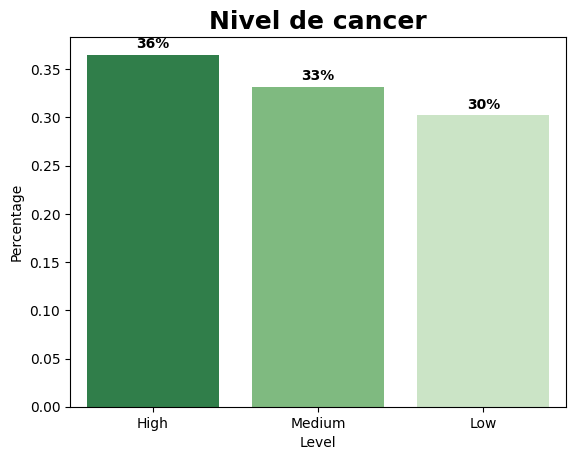

In [6]:
plt.title('Nivel de cancer', fontsize=18, fontweight='bold')

eda_percentage = data['Level'].value_counts(normalize = True).rename_axis('Level').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Level', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

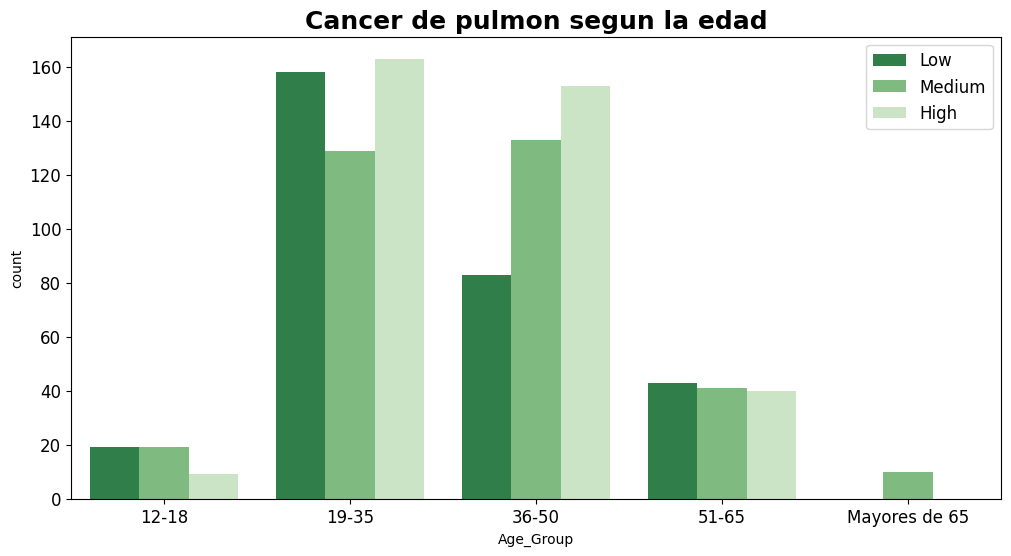

In [7]:
def Age_Group(x):
    x = int(x)
    x = abs(x)
    if( 11 < x < 19 ):
        return "12-18"
    if( 18 < x < 36 ):
        return "19-35"
    if( 35 < x < 51 ):
        return "36-50"
    if( 50 < x < 66 ):
        return "51-65"
    else:
        return "Mayores de 65"

data['Age_Group'] = data['Age'].apply(Age_Group)

plt.figure(figsize=(12,6))
order_list = ['12-18', '19-35', '36-50', '51-65', 'Mayores de 65']

sns.countplot(x = data['Age_Group'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun la edad', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

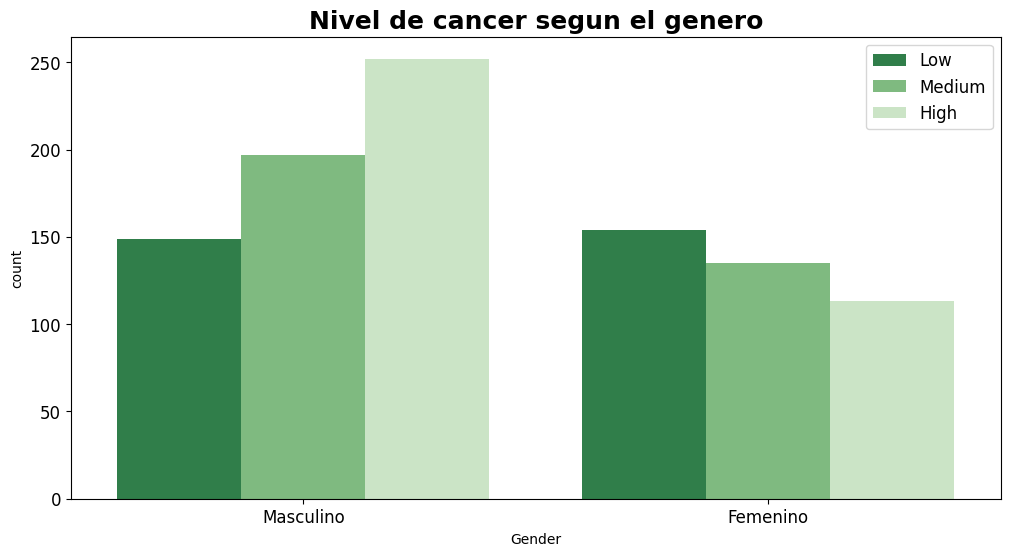

In [8]:
# Nivel de cancer segun el genero, maculino
plt.figure(figsize=(12,6))

sns.countplot(x = data['Gender'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el genero', fontsize=18, fontweight='bold')
plt.xticks([0, 1], ['Masculino', 'Femenino'], fontsize = 12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Los de genero **Masculino** son más propensos a tener cancer de pulmon debido a que el riesgo **High** es más del 40% en comparación de los niveles **Low y Medium**
*   Los de genero **Femenino** son menos propensas a tener cancer pulmon, ya que el nivel **Low** es aproximadamente 40%

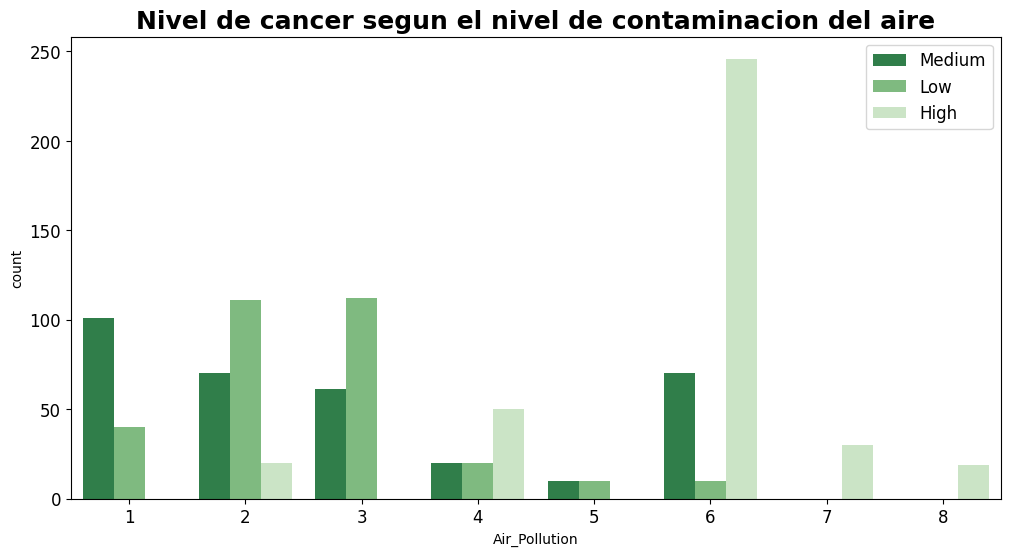

In [9]:
# Nivel de cancer de pulmon según el nivel de contaminacion del aire
plt.figure(figsize=(12,6))

sns.countplot(x = data['Air_Pollution'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de contaminacion del aire', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

*   Para el nivel 2 y 3, el nivel de cancer de pulmon es **Low**, siguiendo el de nivel **Medium** y pocas veces el nivel **High**.
*   Para niveles 6, 7 y 8 es donde la probabilidad de tener cancer de pulmon es más elevada donde practicamente el nivel **High** abarca todos los datos.


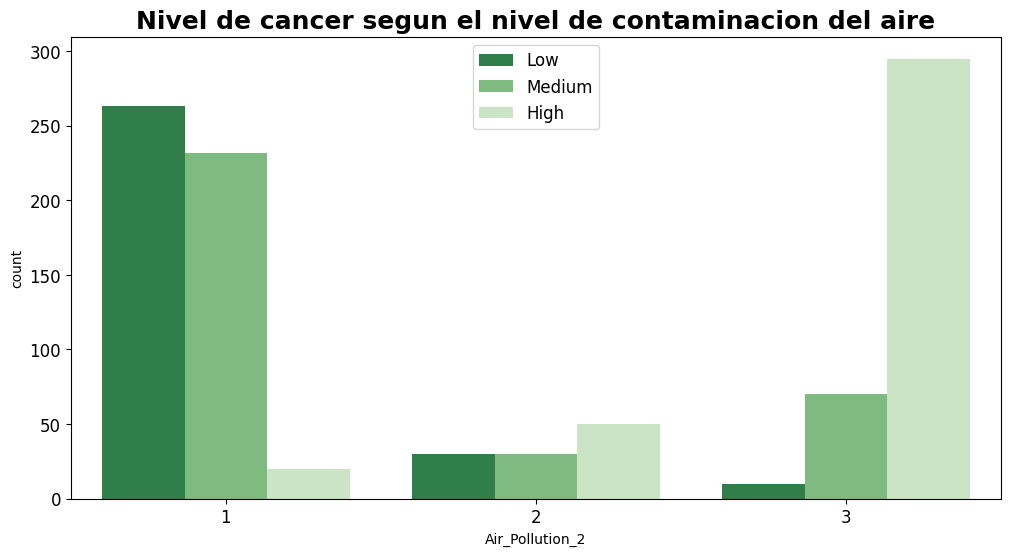

In [10]:
def Air_Pollution(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 3 ):
        return 1
    if( 4 <= x <= 5 ):
        return 2
    if( 6 <= x <= 8 ):
        return 3

data['Air_Pollution_2'] = data['Air_Pollution'].apply(Air_Pollution)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Air_Pollution_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Nivel de cancer segun el nivel de contaminacion del aire', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.


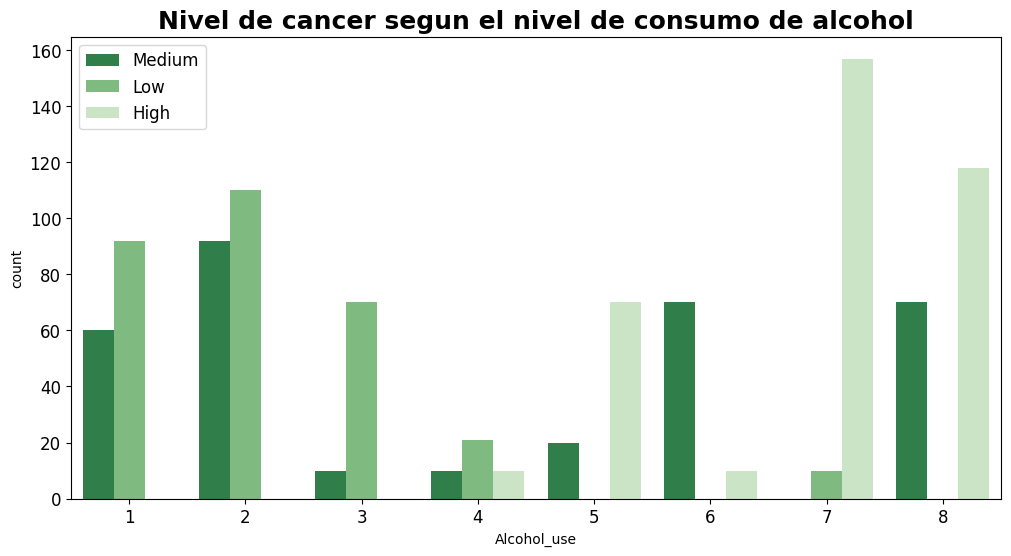

In [11]:
# Nivel de cancer de pulmon según el nivel de consumo de alcohol
plt.figure(figsize=(12,6))

sns.countplot(x = data['Alcohol_use'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de consumo de alcohol', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

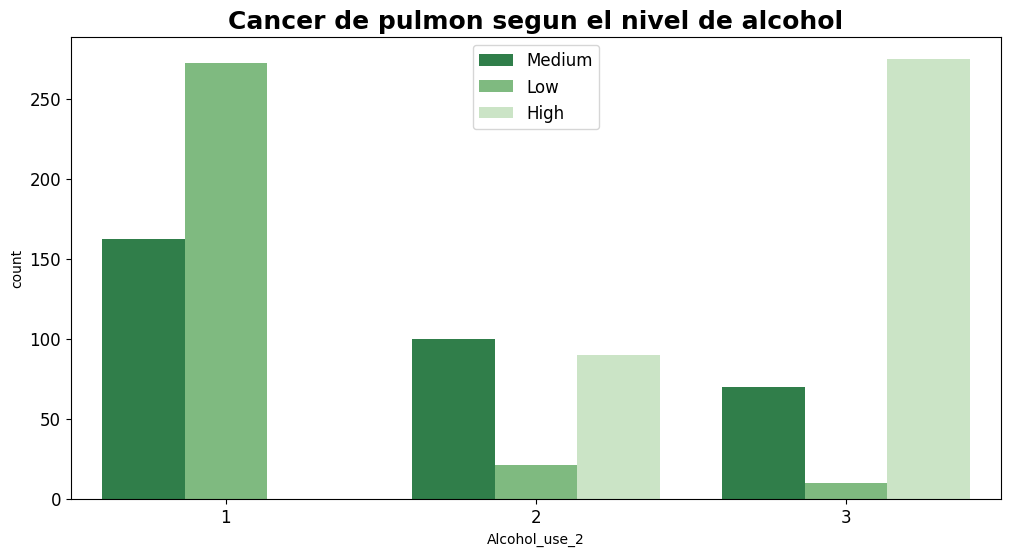

In [12]:
def Alcohol_use(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 3 ):
        return 1
    if( 4 <= x <= 6 ):
        return 2
    if( 7 <= x <= 8 ):
        return 3

data['Alcohol_use_2'] = data['Alcohol_use'].apply(Alcohol_use)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Alcohol_use_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de alcohol', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

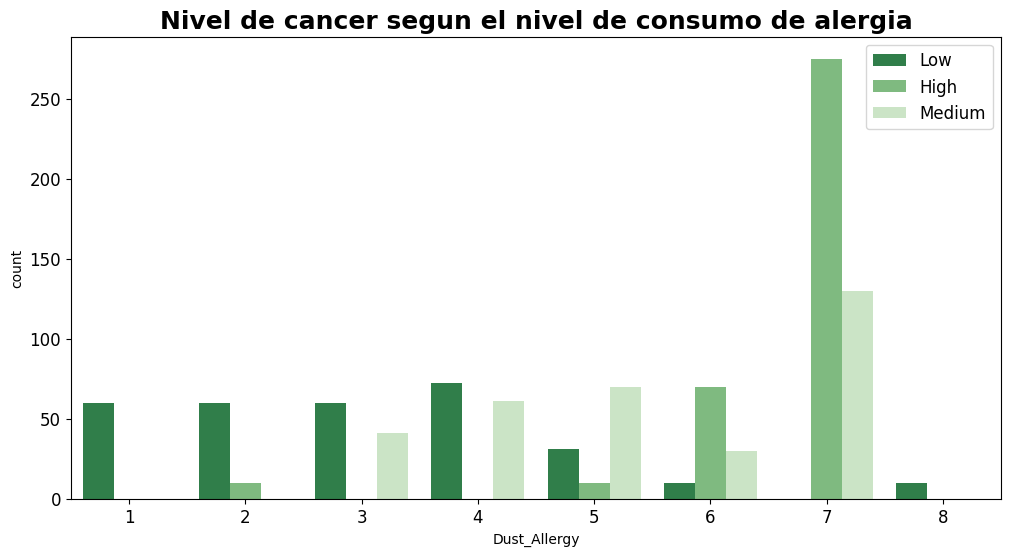

In [13]:
# Nivel de cancer de pulmon según el nivel de alergia
plt.figure(figsize=(12,6))

sns.countplot(x = data['Dust_Allergy'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de consumo de alergia', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

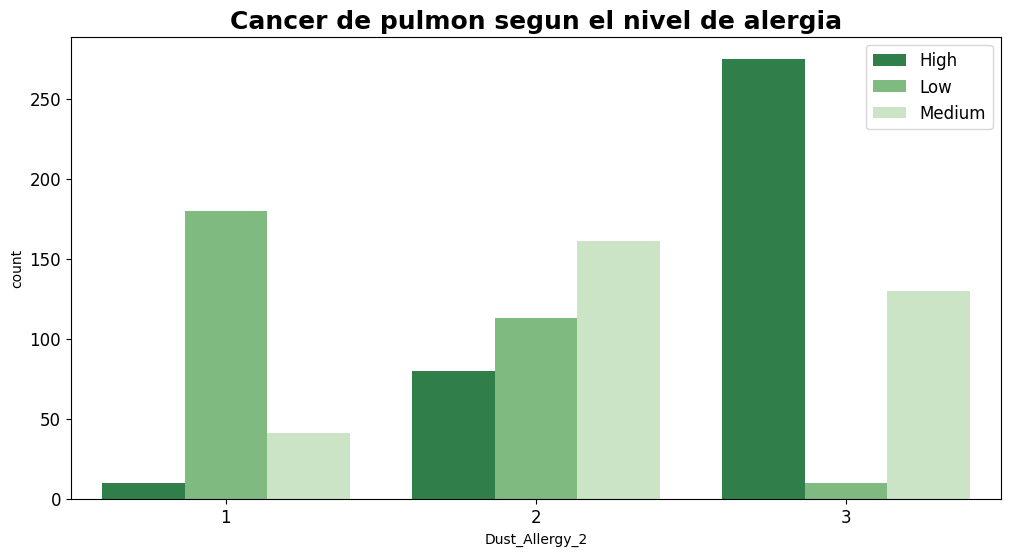

In [14]:
def Dust_Allergy(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 3 ):
        return 1
    if( 4 <= x <= 6 ):
        return 2
    if( 7 <= x <= 8 ):
        return 3

data['Dust_Allergy_2'] = data['Dust_Allergy'].apply(Dust_Allergy)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Dust_Allergy_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de alergia', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

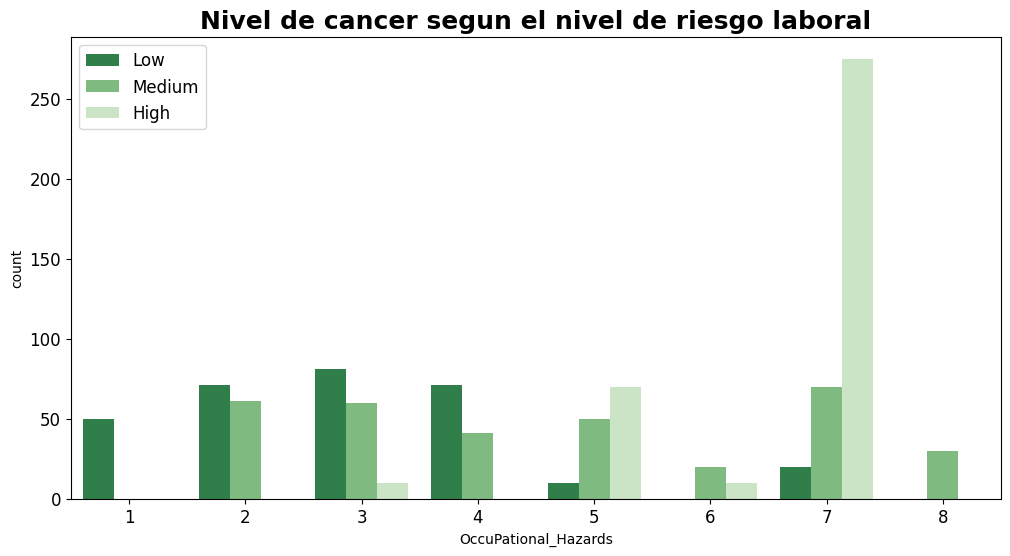

In [15]:
# Nivel de cancer de pulmon según el nivel de riesgo laboral
plt.figure(figsize=(12,6))

sns.countplot(x = data['OccuPational_Hazards'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de riesgo laboral', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

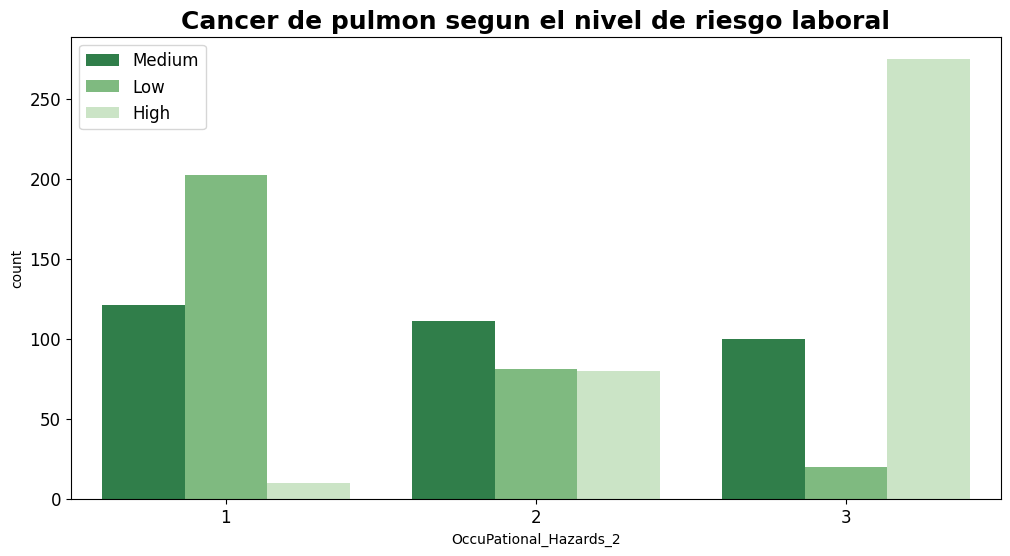

In [16]:
def OccuPational_Hazards(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 3 ):
        return 1
    if( 4 <= x <= 6 ):
        return 2
    if( 7 <= x <= 8 ):
        return 3

data['OccuPational_Hazards_2'] = data['OccuPational_Hazards'].apply(OccuPational_Hazards)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['OccuPational_Hazards_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de riesgo laboral', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

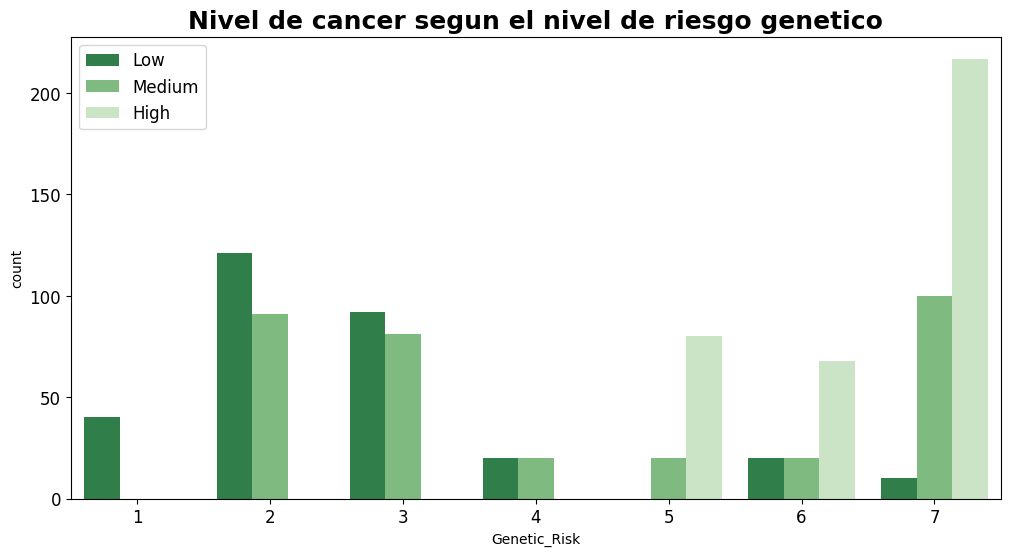

In [17]:
# Nivel de cancer de pulmon según el nivel de riesgo genetico
plt.figure(figsize=(12,6))

sns.countplot(x = data['Genetic_Risk'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de riesgo genetico', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

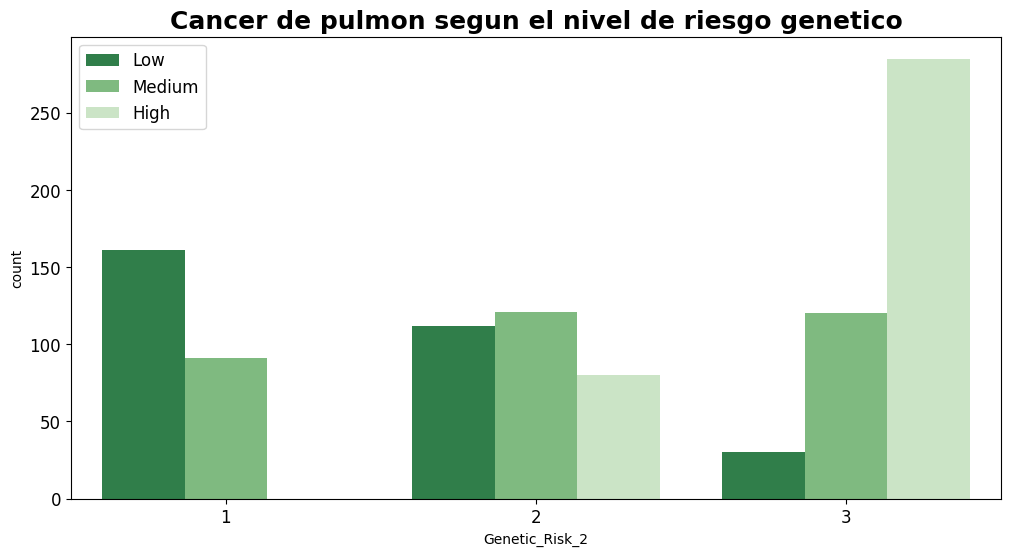

In [18]:
def Genetic_Risk(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 2 ):
        return 1
    if( 3 <= x <= 5 ):
        return 2
    if( 6 <= x <= 7 ):
        return 3

data['Genetic_Risk_2'] = data['Genetic_Risk'].apply(Genetic_Risk)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Genetic_Risk_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de riesgo genetico', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

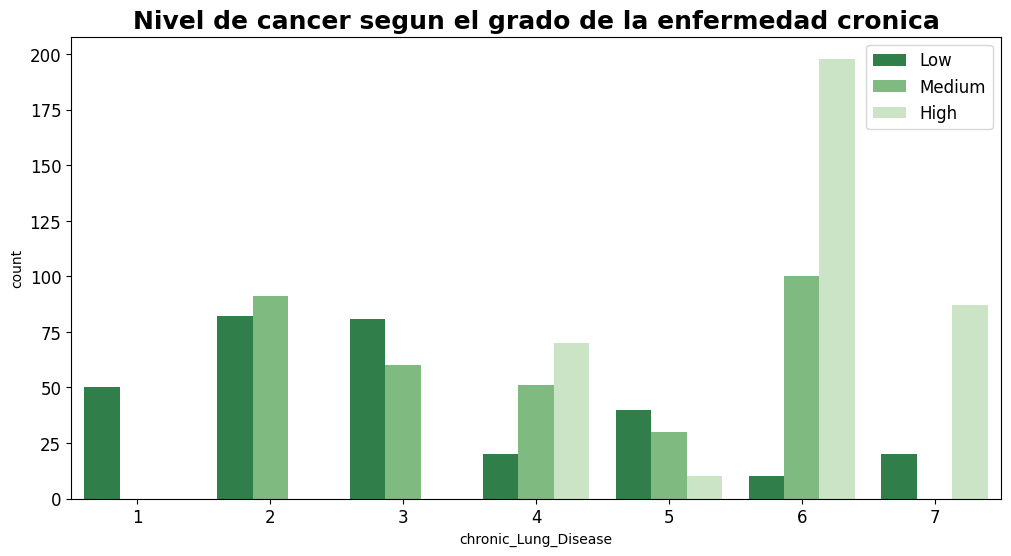

In [19]:
# Nivel de cancer de pulmon según el grado de la enfermedad cronica
plt.figure(figsize=(12,6))

sns.countplot(x = data['chronic_Lung_Disease'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el grado de la enfermedad cronica', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

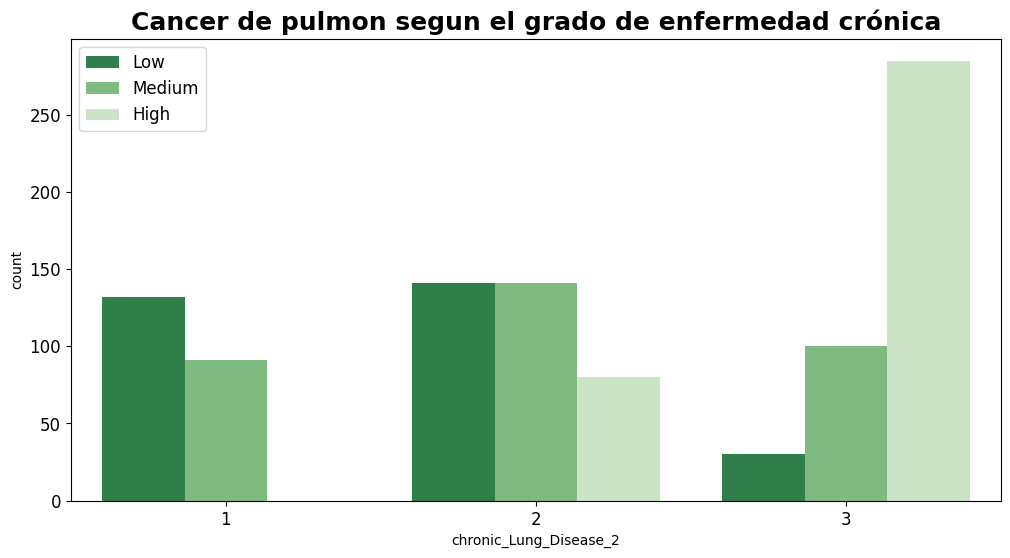

In [20]:
def chronic_Lung_Disease(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 2 ):
        return 1
    if( 3 <= x <= 5 ):
        return 2
    if( 6 <= x <= 7 ):
        return 3

data['chronic_Lung_Disease_2'] = data['chronic_Lung_Disease'].apply(chronic_Lung_Disease)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['chronic_Lung_Disease_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el grado de enfermedad crónica', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

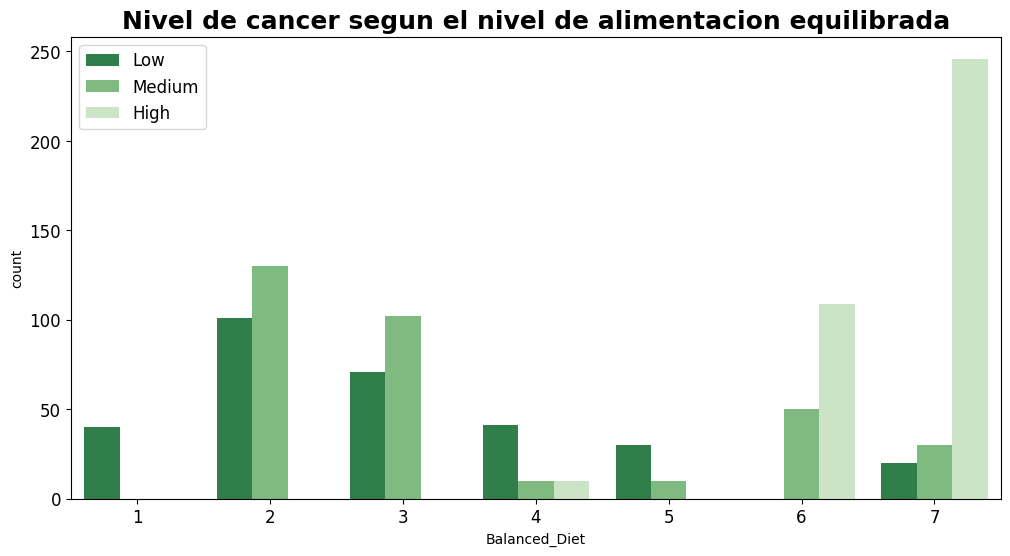

In [21]:
# Nivel de cancer de pulmon según el nivel de alimentacion equilibrada
plt.figure(figsize=(12,6))

sns.countplot(x = data['Balanced_Diet'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de alimentacion equilibrada', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

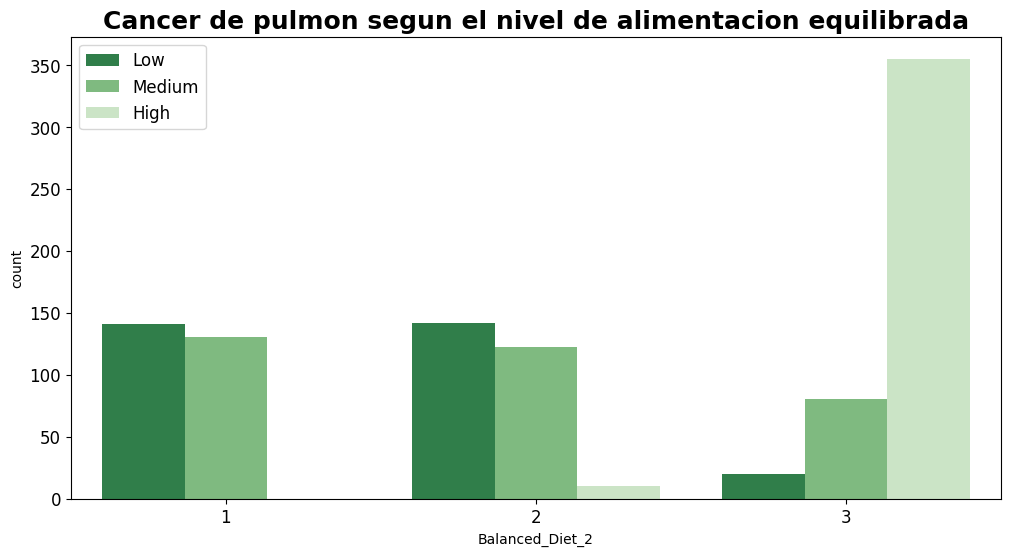

In [22]:
def Balanced_Diet(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 2 ):
        return 1
    if( 3 <= x <= 5 ):
        return 2
    if( 6 <= x <= 7 ):
        return 3

data['Balanced_Diet_2'] = data['Balanced_Diet'].apply(chronic_Lung_Disease)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Balanced_Diet_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de alimentacion equilibrada', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

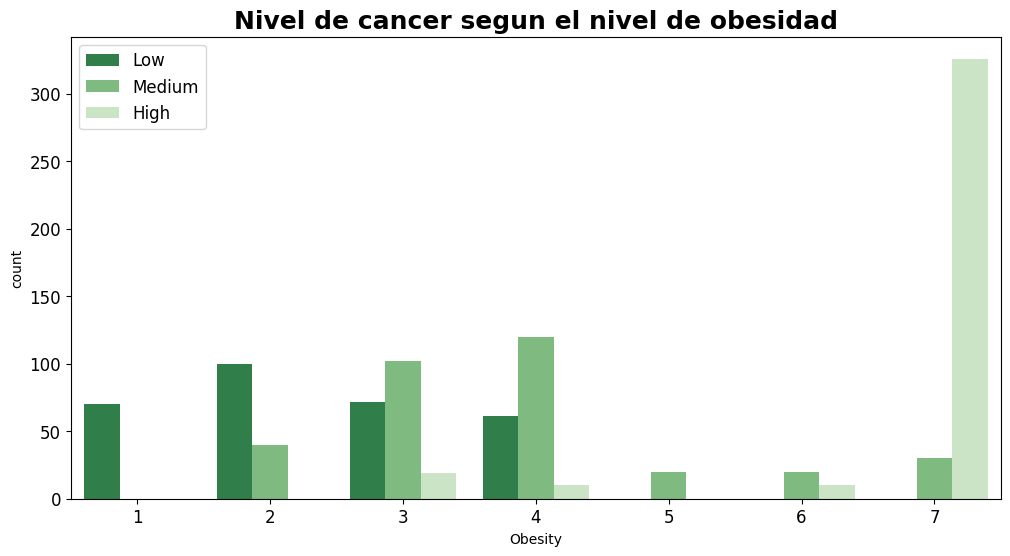

In [23]:
# Nivel de cancer de pulmon según el nivel de obesidad
plt.figure(figsize=(12,6))

sns.countplot(x = data['Obesity'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de obesidad', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

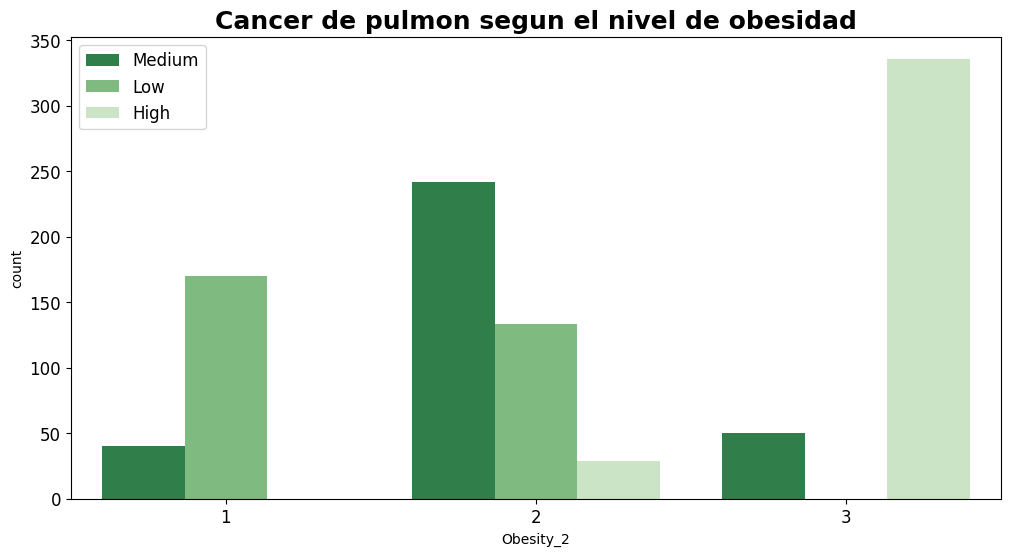

In [24]:
def Obesity(x):
    x = int(x)
    x = abs(x)
    if( 1 <= x <= 2 ):
        return 1
    if( 3 <= x <= 5 ):
        return 2
    if( 6 <= x <= 7 ):
        return 3

data['Obesity_2'] = data['Obesity'].apply(chronic_Lung_Disease)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Obesity_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de obesidad', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

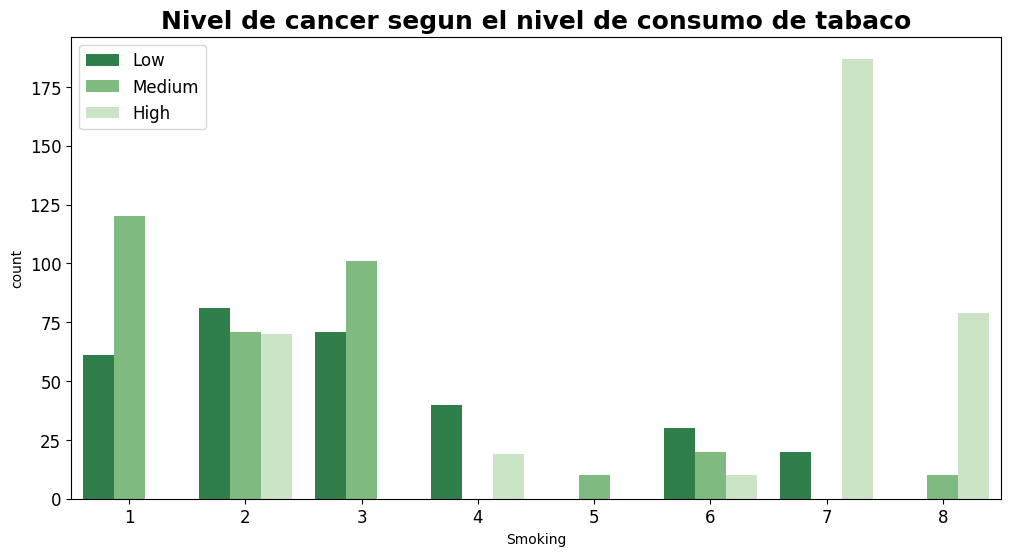

In [25]:
# Nivel de cancer de pulmon según el nivel de consumo de tabaco
plt.figure(figsize=(12,6))

sns.countplot(x = data['Smoking'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de consumo de tabaco', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

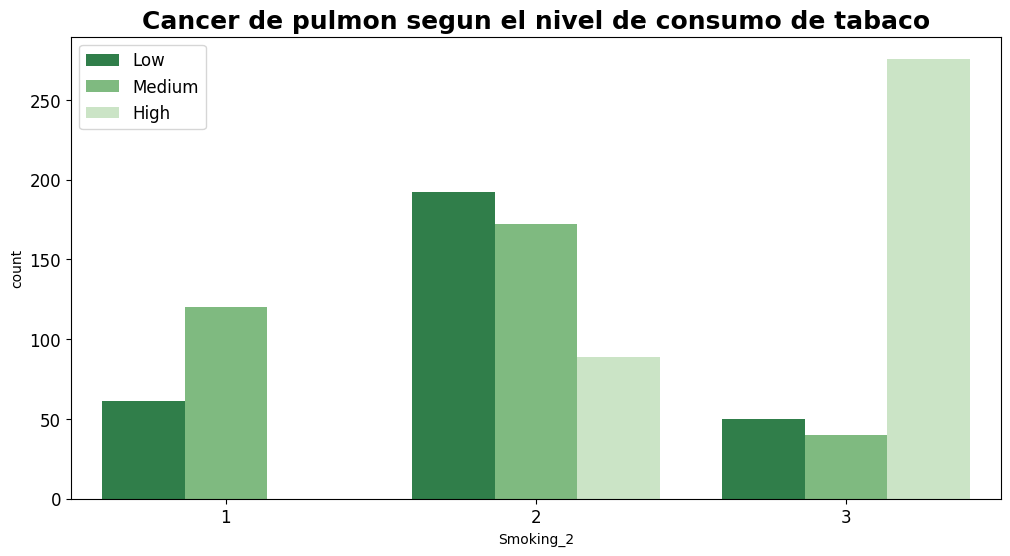

In [26]:
def Smoking(x):
    x = int(x)
    x = abs(x)
    if( x == 1):
        return 1
    if( 2 <= x <= 4 ):
        return 2
    if( 5 <= x <= 8 ):
        return 3

data['Smoking_2'] = data['Smoking'].apply(Smoking)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Smoking_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de consumo de tabaco', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

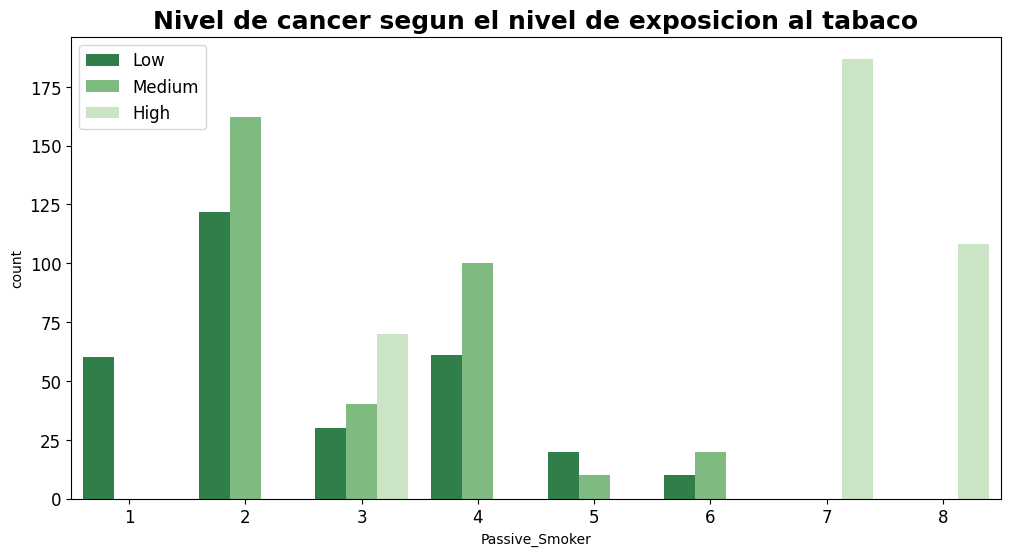

In [27]:
# Nivel de cancer de pulmon según el nivel de exposicion al tabaco
plt.figure(figsize=(12,6))

sns.countplot(x = data['Passive_Smoker'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de exposicion al tabaco', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

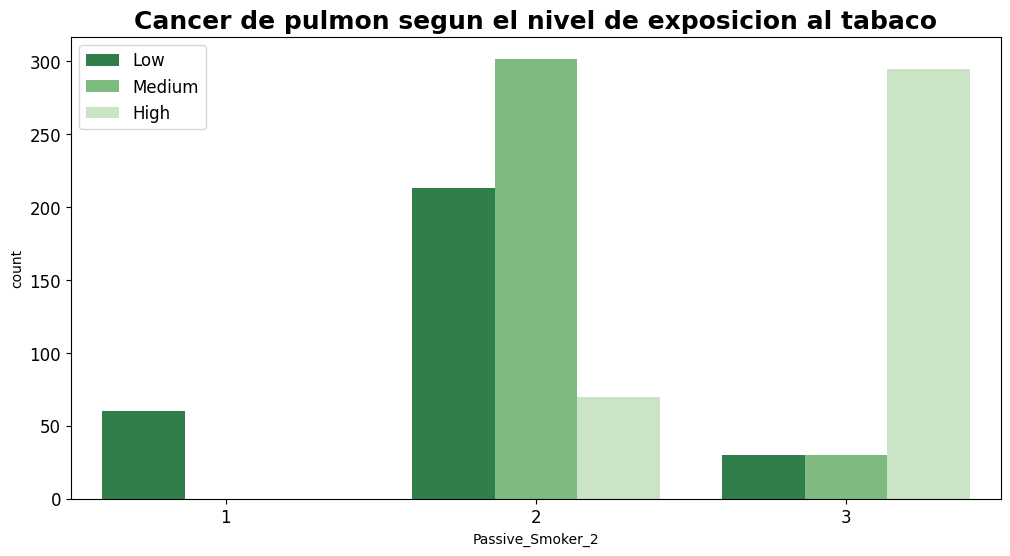

In [28]:
def Passive_Smoker(x):
    x = int(x)
    x = abs(x)
    if( x == 1):
        return 1
    if( 2 <= x <= 4 ):
        return 2
    if( 5 <= x <= 8 ):
        return 3

data['Passive_Smoker_2'] = data['Passive_Smoker'].apply(Passive_Smoker)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Passive_Smoker_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de exposicion al tabaco', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

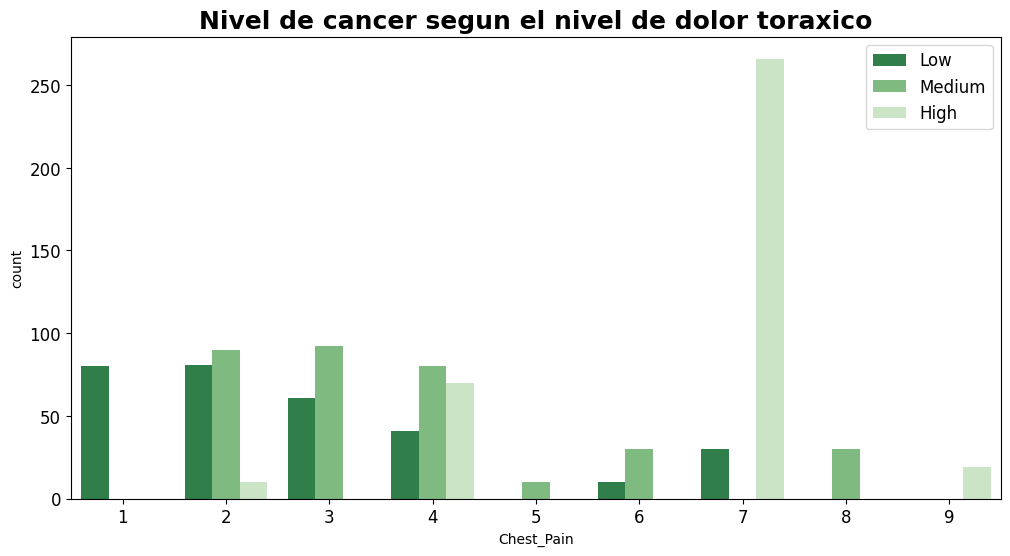

In [29]:
# Nivel de cancer de pulmon según el nivel de dolor toraxico
plt.figure(figsize=(12,6))

sns.countplot(x = data['Chest_Pain'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de dolor toraxico', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

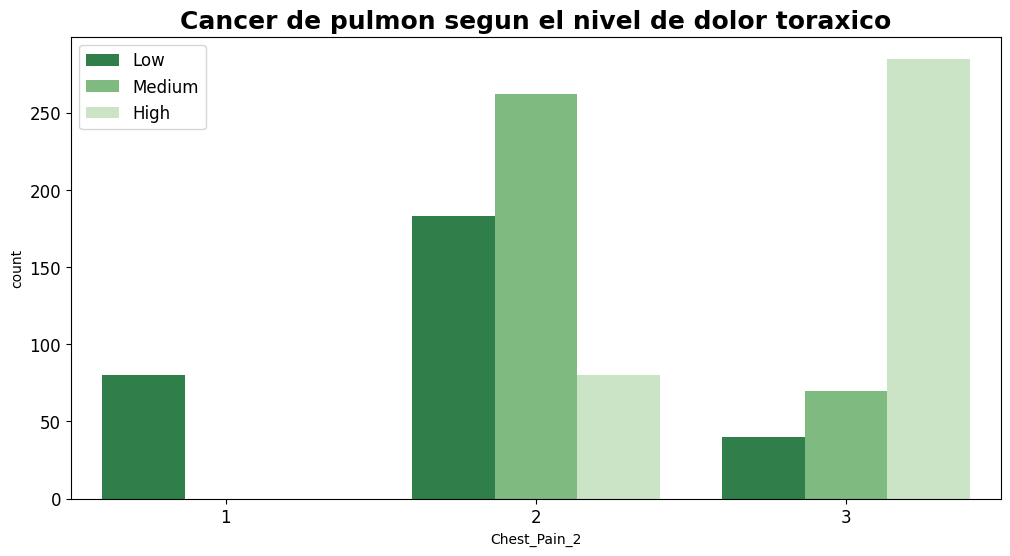

In [30]:
def Chest_Pain(x):
    x = int(x)
    x = abs(x)
    if( x == 1):
        return 1
    if( 2 <= x <= 4 ):
        return 2
    if( 5 <= x <= 9 ):
        return 3

data['Chest_Pain_2'] = data['Chest_Pain'].apply(Chest_Pain)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Chest_Pain_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de dolor toraxico', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

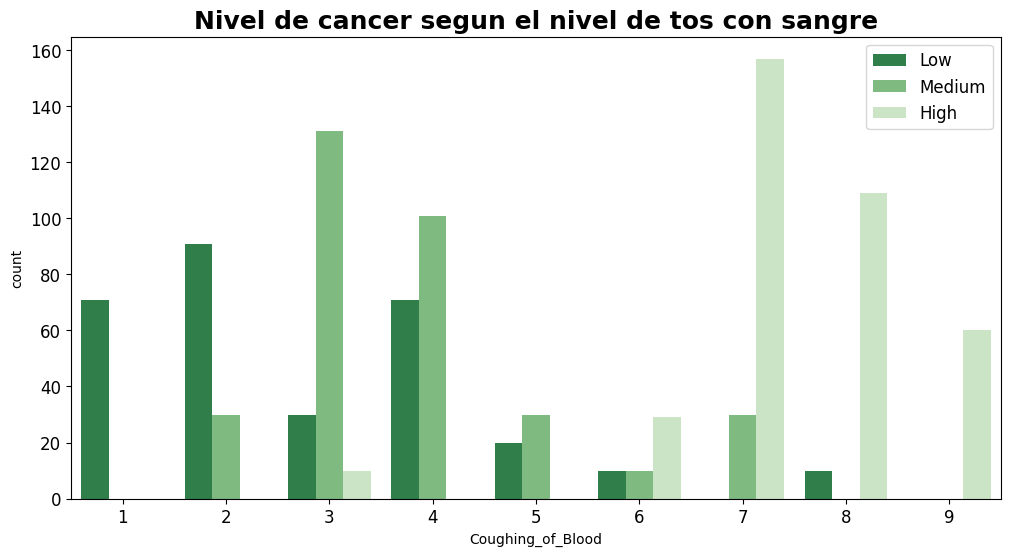

In [31]:
# Nivel de cancer de pulmon según el nivel de tos con sangre
plt.figure(figsize=(12,6))

sns.countplot(x = data['Coughing_of_Blood'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de tos con sangre', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

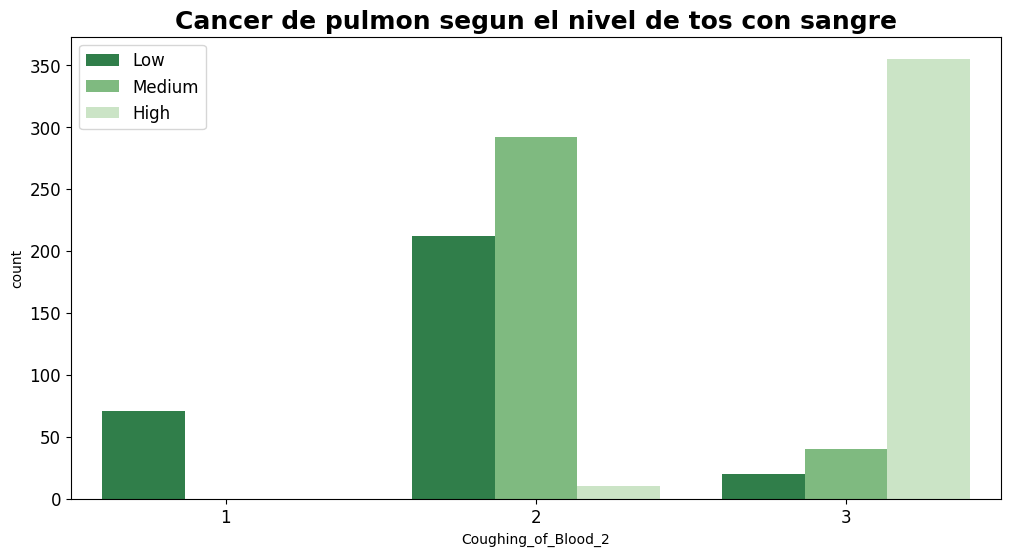

In [32]:
def Coughing_of_Blood(x):
    x = int(x)
    x = abs(x)
    if( x == 1):
        return 1
    if( 2 <= x <= 5 ):
        return 2
    if( 6 <= x <= 9 ):
        return 3

data['Coughing_of_Blood_2'] = data['Coughing_of_Blood'].apply(Coughing_of_Blood)

plt.figure(figsize=(12,6))
order_list = [1, 2, 3]

sns.countplot(x = data['Coughing_of_Blood_2'], data = data, hue = data['Level'], palette='Greens_r', order = order_list)

plt.title('Cancer de pulmon segun el nivel de tos con sangre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

Observacion:
*   Es uno los atributos importantes que se seleccionó para hacer el modelo donde se muestra más adelante.
*   Se acortó las alternativas, ya que sigue la tendencia de que cada vez el numero de la alternativa sea mayor (Muy frecuente), entonces el nivel de cancer es más probable.

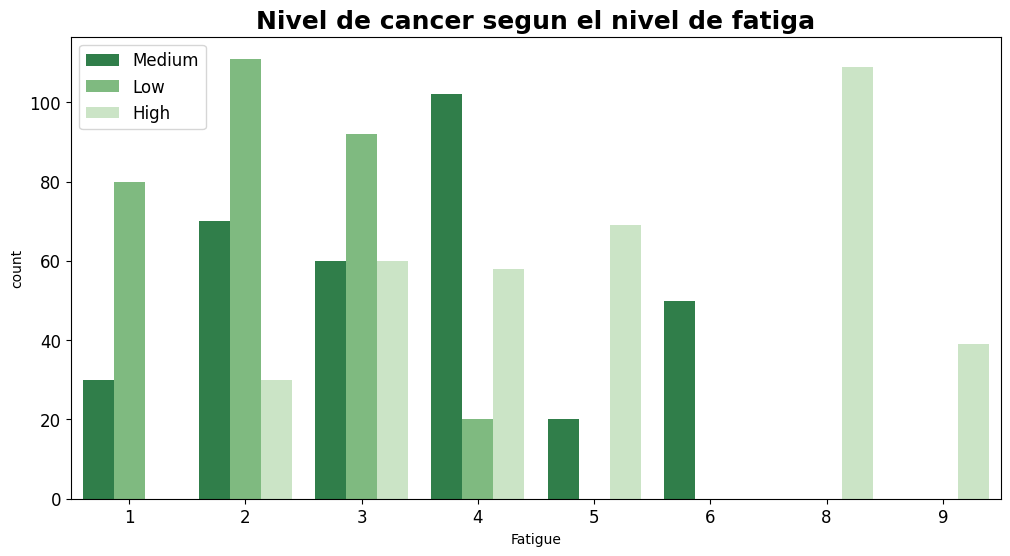

In [33]:
# Nivel de cancer de pulmon según el nivel de fatiga
plt.figure(figsize=(12,6))

sns.countplot(x = data['Fatigue'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de fatiga', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

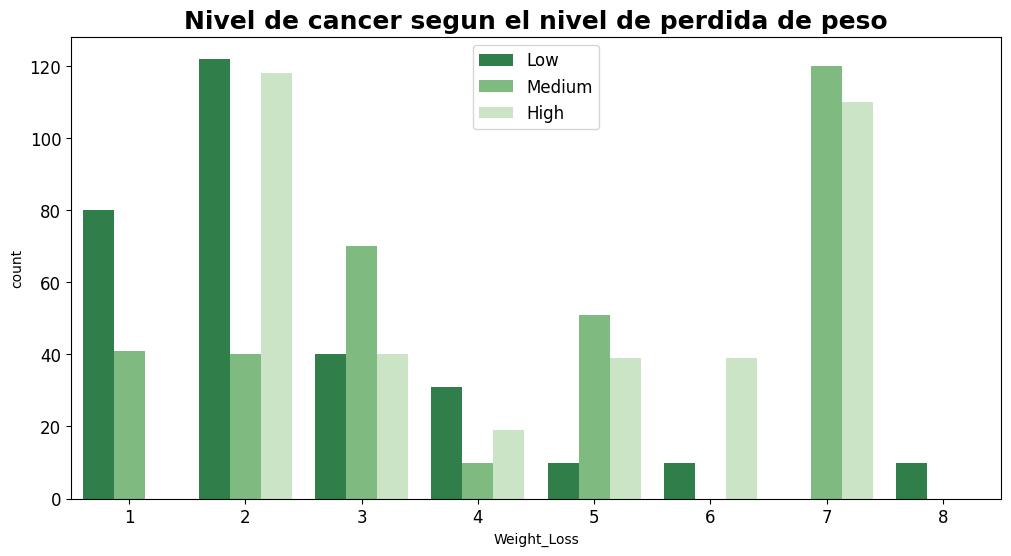

In [34]:
# Nivel de cancer de pulmon según el nivel de perdidad de peso
plt.figure(figsize=(12,6))

sns.countplot(x = data['Weight_Loss'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de perdida de peso', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

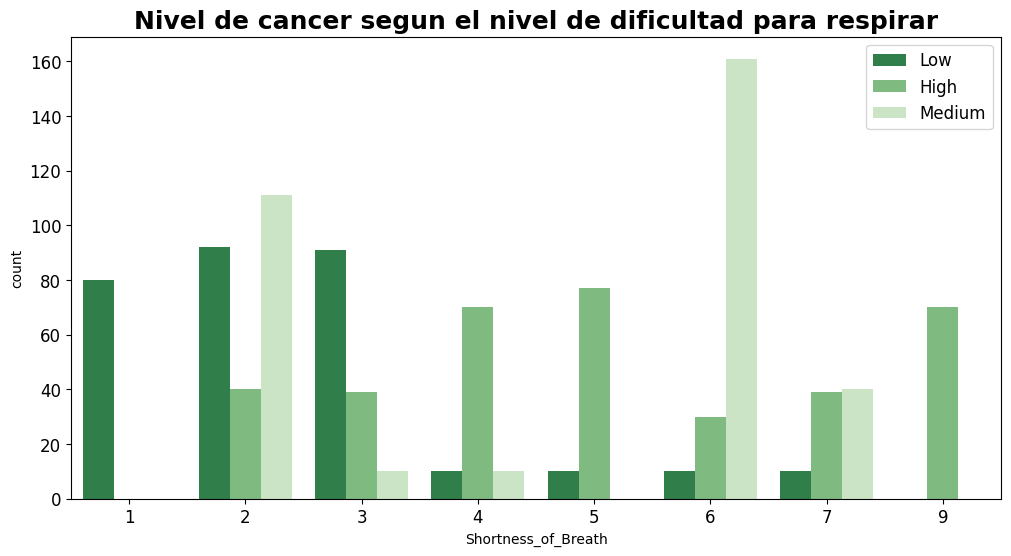

In [35]:
# Nivel de cancer de pulmon según el nivel de dificultad para respirar
plt.figure(figsize=(12,6))

sns.countplot(x = data['Shortness_of_Breath'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de dificultad para respirar', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


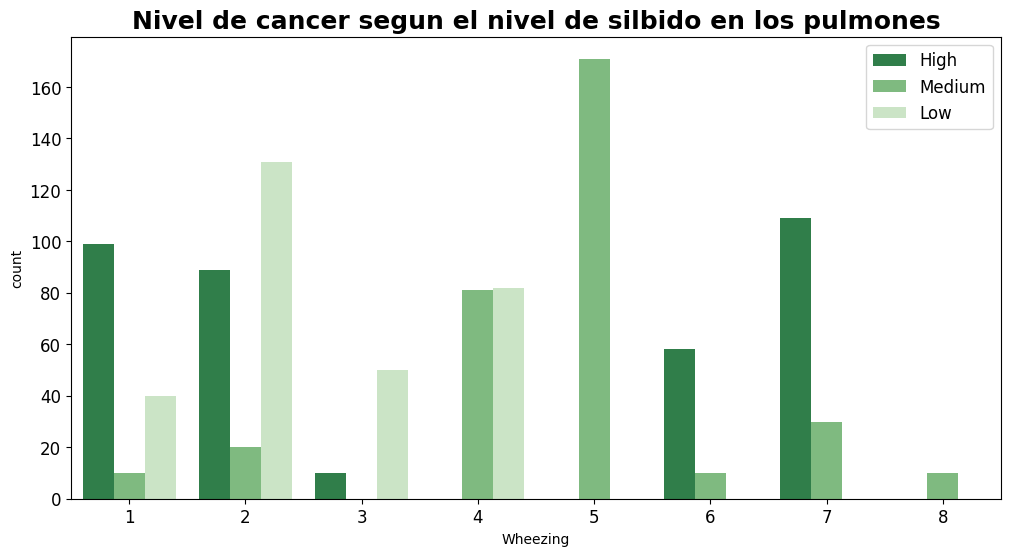

In [36]:
# Nivel de cancer de pulmon según el nivel de silbido en los pulmones
plt.figure(figsize=(12,6))

sns.countplot(x = data['Wheezing'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de silbido en los pulmones', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


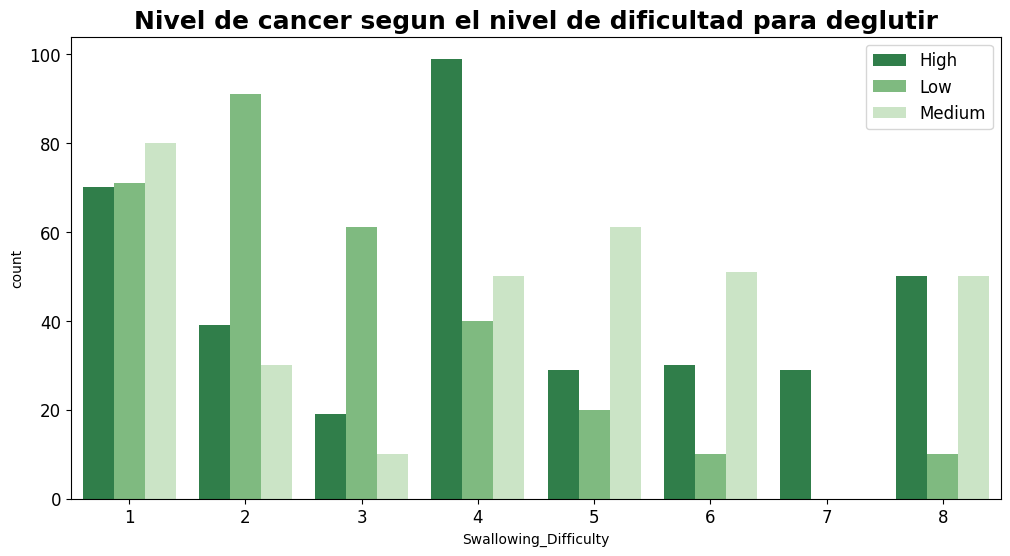

In [37]:
# Nivel de cancer de pulmon según el nivel de dificultad para deglutir
plt.figure(figsize=(12,6))

sns.countplot(x = data['Swallowing_Difficulty'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de dificultad para deglutir', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


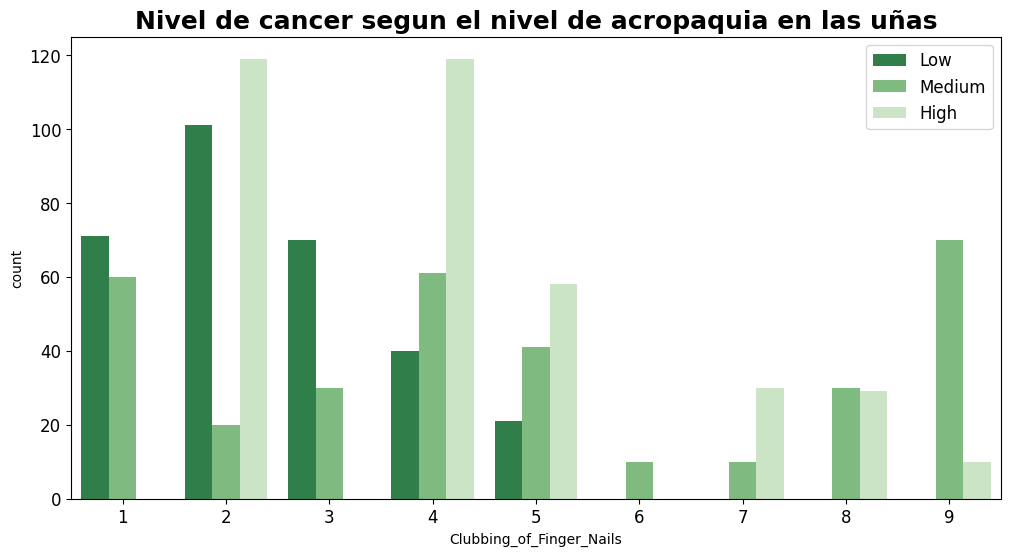

In [38]:
# Nivel de cancer de pulmon según el nivel de acropaquia en las uñas
plt.figure(figsize=(12,6))

sns.countplot(x = data['Clubbing_of_Finger_Nails'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de acropaquia en las uñas', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

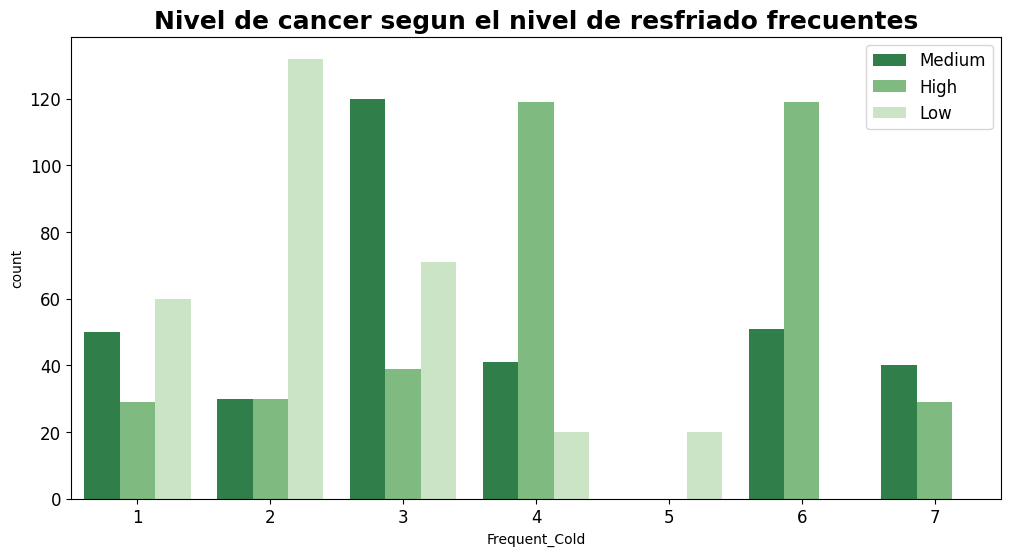

In [39]:
# Nivel de cancer de pulmon según el nivel de resfriado frecuentes
plt.figure(figsize=(12,6))

sns.countplot(x = data['Frequent_Cold'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de resfriado frecuentes', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

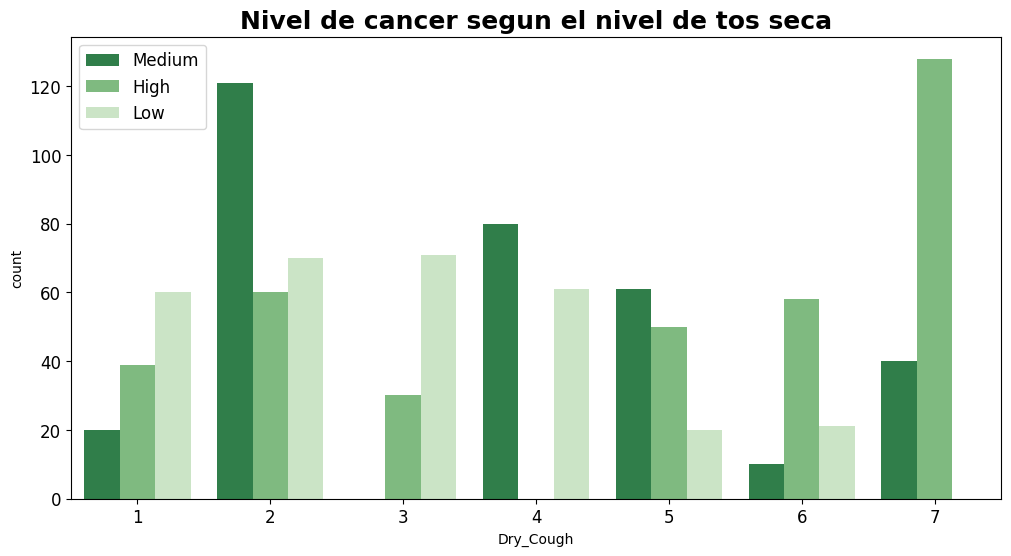

In [40]:
# Nivel de cancer de pulmon según el nivel de tos seca
plt.figure(figsize=(12,6))

sns.countplot(x = data['Dry_Cough'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de tos seca', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

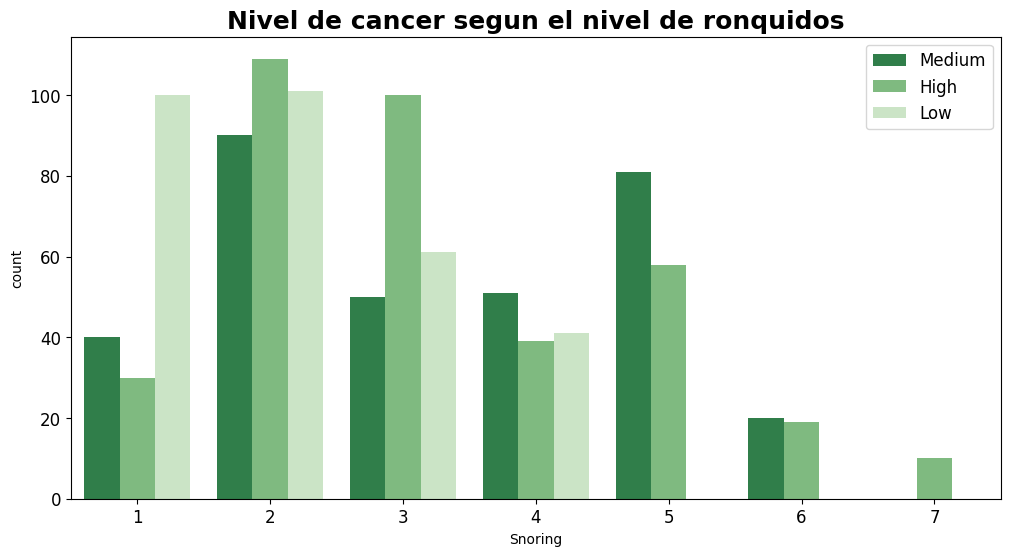

In [41]:
# Nivel de cancer de pulmon según el nivel de ronquidos
plt.figure(figsize=(12,6))

sns.countplot(x = data['Snoring'], data = data, hue = data['Level'], palette='Greens_r')

plt.title('Nivel de cancer segun el nivel de ronquidos', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

# Preparación de los datos

In [42]:
# Verificar datos duplicados
duplicado = data.duplicated().sum()
print("Datos duplicados:", duplicado)


Datos duplicados: 848


In [43]:
# Eliminar los duplicados
data.drop_duplicates(inplace=True)

# Verificar si se eliminaron los duplicados
duplicado = data.duplicated().sum()
print("Datos duplicados después de eliminar:", duplicado)

Datos duplicados después de eliminar: 0


In [44]:
# Verificar datos faltantes
dato_faltantes = data.isnull().sum().sum()
print("Cantidad de datos faltantes:", dato_faltantes)

Cantidad de datos faltantes: 0


In [45]:
data['Level'].value_counts()

Level
High      53
Medium    52
Low       47
Name: count, dtype: int64

In [46]:
# Convertir de Object  a int
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas
Object = ['Level', 'Age_Group']
label_encoder = LabelEncoder()

# Transformar las columnas categóricas a numerica
for col in Object:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])

# Modelado

In [47]:
AtributosNoUtilzados = ['Level', 'Age', 'Obesity_2','Coughing_of_Blood_2','Balanced_Diet_2','Passive_Smoker_2',
            'Dust_Allergy_2','Alcohol_use_2','Genetic_Risk_2','Air_Pollution_2',
            'Chest_Pain_2','OccuPational_Hazards_2', 'chronic_Lung_Disease_2','Smoking_2']

X = data.drop(columns = AtributosNoUtilzados)
y = data['Level']

In [48]:
# dividiendo en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Evaluación

Árbol de Decisión
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.90      0.82      0.86        11
           2       0.94      1.00      0.97        17

    accuracy                           0.93        46
   macro avg       0.93      0.92      0.92        46
weighted avg       0.93      0.93      0.93        46



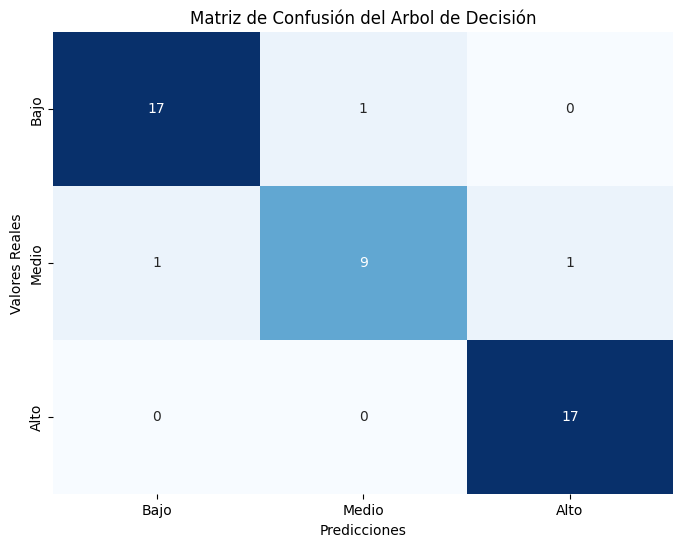

Precisión Árbol de Decisión: 0.93


In [49]:
# entrenando el modelo de arbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# evaluando el modelo
y_pred_tree = decision_tree.predict(X_test)

print("Árbol de Decisión")
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(8, 6))
class_labels = ["Bajo", "Medio", "Alto"]

sns.heatmap( confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión del Arbol de Decisión")
plt.show()

print(f'Precisión Árbol de Decisión: {accuracy_score(y_test, y_pred_tree):.2f}')

Regresión logistica
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        17

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



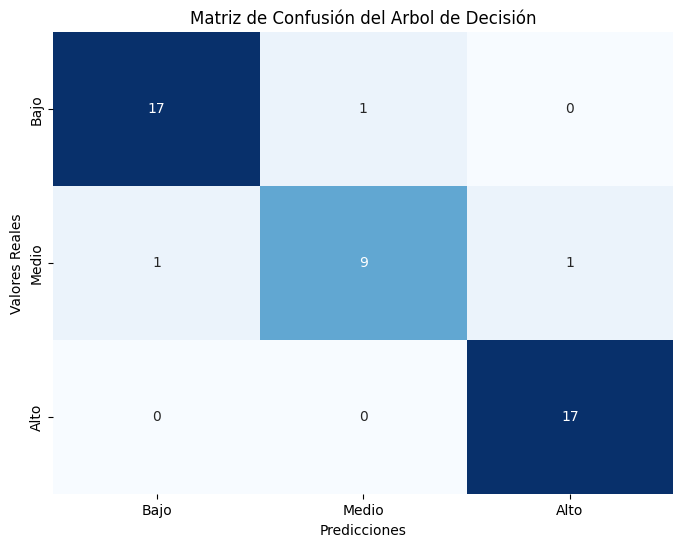

Precisión del modelo con Regresion Logistica: 0.98


In [50]:
# entrenando el modelo de Regresion Logistica
model_LR = LogisticRegression(max_iter = 1000)
model_LR.fit(X_train, y_train)

# evaluando el modelo
y_pred_LR = model_LR.predict(X_test)

print("Regresión logistica")
print(classification_report(y_test, y_pred_LR))

plt.figure(figsize=(8, 6))
class_labels = ["Bajo", "Medio", "Alto"]

sns.heatmap( confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión del Arbol de Decisión")
plt.show()

print(f'Precisión del modelo con Regresion Logistica: {accuracy_score(y_test, y_pred_LR):.2f}')

Entrenamiento con los atributos necesarios

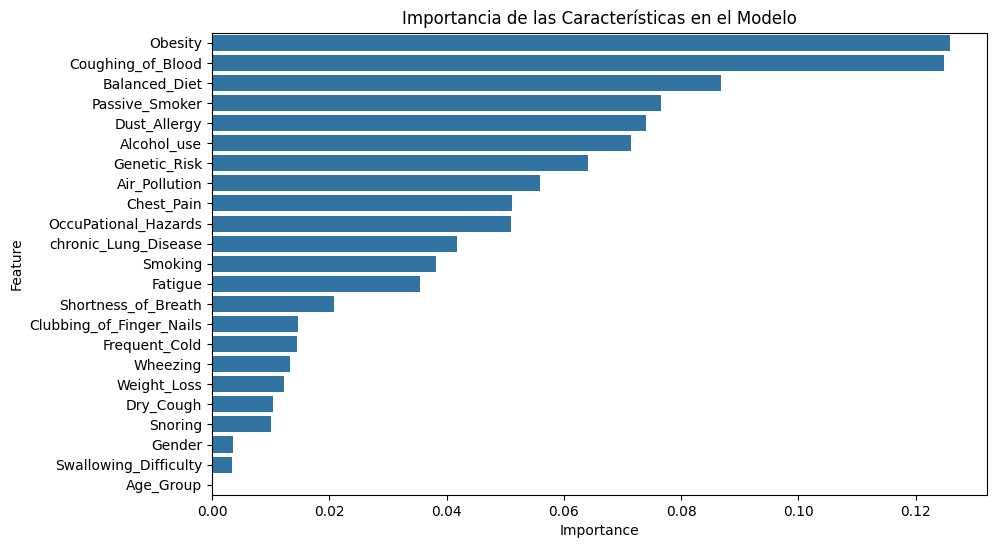

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func = f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_
feature_names = X.columns
importances = scores / np.sum(scores)

# creando un DataFrame para visualizar la importancia
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# visualizando la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características en el Modelo')
plt.show()

De aquí se extrae los atributos más importantes para detectar el cancer de pulmón y con ello hacer un nuevo modelo.

In [52]:
# Se extraen los atributos más importantes
features = ['Obesity_2','Coughing_of_Blood_2','Balanced_Diet_2','Passive_Smoker_2',
            'Dust_Allergy_2','Alcohol_use_2','Genetic_Risk_2','Air_Pollution_2',
            'Chest_Pain_2','OccuPational_Hazards_2', 'chronic_Lung_Disease_2','Smoking_2']

# Nuevo modelo solo con los atributos impostantes
X = data[features]
y = data['Level']

# dividiendo en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Árbol de Decisión
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17

    accuracy                           0.93        46
   macro avg       0.95      0.92      0.93        46
weighted avg       0.94      0.93      0.93        46



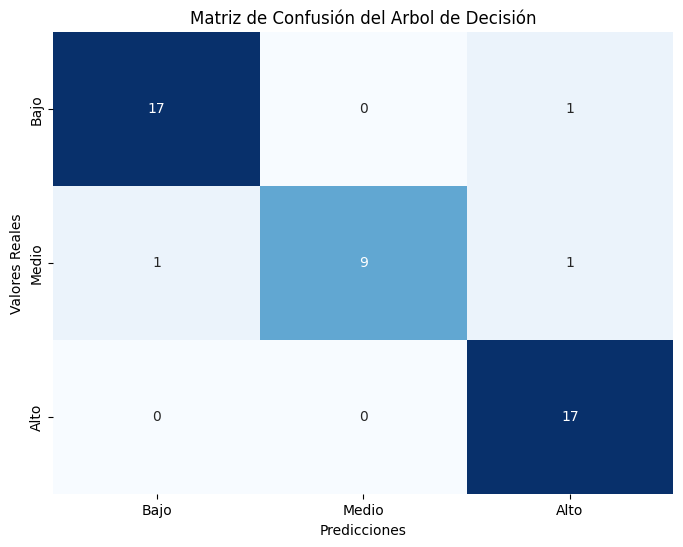

Precisión Árbol de Decisión: 0.93


In [53]:
# entrenando el modelo de arbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# evaluando el modelo
y_pred_tree = decision_tree.predict(X_test)

print("Árbol de Decisión")
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(8, 6))
class_labels = ["Bajo", "Medio", "Alto"]

sns.heatmap( confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión del Arbol de Decisión")
plt.show()

print(f'Precisión Árbol de Decisión: {accuracy_score(y_test, y_pred_tree):.2f}')


Regresión logistica
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.67      0.55      0.60        11
           2       0.72      0.76      0.74        17

    accuracy                           0.78        46
   macro avg       0.76      0.75      0.75        46
weighted avg       0.78      0.78      0.78        46



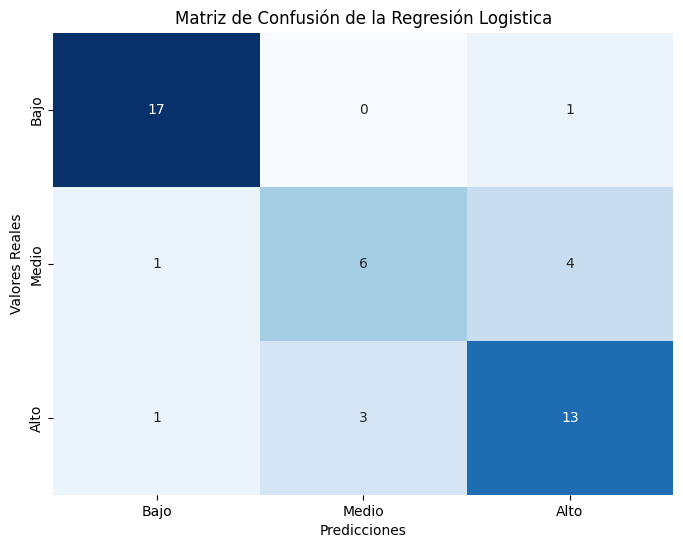

Precisión del modelo con Regresion Logistica: 0.78


In [54]:
# entrenando el modelo de Regresión Logistica
model_LR = LogisticRegression(max_iter = 1000)
model_LR.fit(X_train, y_train)

# evaluando el modelo
y_pred_LR = model_LR.predict(X_test)

print("Regresión logistica")
print(classification_report(y_test, y_pred_LR))

plt.figure(figsize=(8, 6))
class_labels = ["Bajo", "Medio", "Alto"]

sns.heatmap( confusion_matrix(y_test, y_pred_LR), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión de la Regresión Logistica")
plt.show()

print(f'Precisión del modelo con Regresion Logistica: {accuracy_score(y_test, y_pred_LR):.2f}')


Por lo tanto, el que tiene un mejor rendimiento y precisión con los atributos que son relevantes para el proyecto es el modelo utilizando Arbol de decisión con un accuracy de 93% en comparación del 78% del modelo con Regresión Logística.

# Despliegue

In [55]:
# Guardar el modelo en una carpeta anterior al directorio actual
joblib.dump(decision_tree, '../modelPredict.pkl')
print("modelPredict entrenado y guardado exitosamente.")

modelPredict entrenado y guardado exitosamente.
